In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, psi = sympy.symbols("t r theta phi psi")

In [3]:
dt, dr, dtheta, dphi, dpsi = sympy.symbols(r"dt dr d\theta d\phi d\psi")

In [4]:
a, b, m, q, g = sympy.symbols("a b m q g")

In [5]:
rplus = sympy.symbols("r_+")

In [6]:
delta_r, delta_theta, rho_squared, xi_a, xi_b, f = sympy.symbols("Delta_r Delta_theta rho^2 Xi_a Xi_b f")

In [7]:
nu, omega = sympy.symbols("nu omega")

### Metric

In [8]:
metric = -delta_theta * ((1 + g ** 2 * r ** 2) * rho_squared * dt + 2 * q * nu) * dt / (xi_a * xi_b * rho_squared)
metric += 2 * q * nu * omega / rho_squared
metric += f * ((delta_theta * dt) / (xi_a * xi_b) - omega) ** 2 / rho_squared ** 2
metric += rho_squared * dr ** 2 / delta_r
metric += rho_squared * dtheta ** 2 / delta_theta
metric += (r ** 2 + a ** 2) * sympy.sin(theta) ** 2 * dphi ** 2 / xi_a
metric += (r ** 2 + b ** 2) * sympy.cos(theta) ** 2 * dpsi ** 2 / xi_b

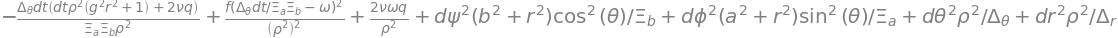

In [9]:
metric

In [10]:
nu_val = b * sympy.sin(theta) ** 2 * dphi + a * sympy.cos(theta) ** 2 * dpsi
nu_val

In [11]:
omega_val = a * sympy.sin(theta) ** 2 * dphi / xi_a + b * sympy.cos(theta) ** 2 * dpsi / xi_b
omega_val

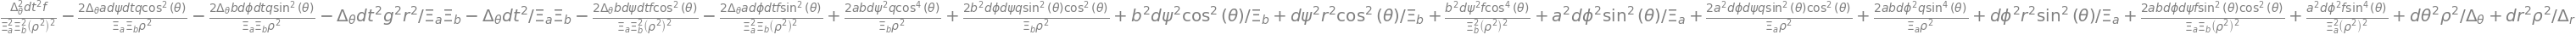

In [12]:
metric = metric.subs({nu: nu_val, omega: omega_val}).expand()
metric

In [13]:
q_val = -(a - 1j * rplus) * (b - 1j * rplus) * (1 - 1j * rplus)
q_val

In [14]:
metric_list_matrix = [[0 for i in range(5)] for i in range(5)]

# dt
metric_list_matrix[0][0] = metric.coeff(dt ** 2).simplify()
metric_list_matrix[0][1] = metric.coeff(dt * dr).simplify()
metric_list_matrix[0][2] = metric.coeff(dt * dtheta).simplify()
metric_list_matrix[0][3] = metric.coeff(dt * dphi).simplify()
metric_list_matrix[0][4] = metric.coeff(dt * dpsi).simplify()

# dr
metric_list_matrix[1][0] = metric.coeff(dr * dt).simplify()
metric_list_matrix[1][1] = metric.coeff(dr ** 2).simplify()
metric_list_matrix[1][2] = metric.coeff(dr * dtheta).simplify()
metric_list_matrix[1][3] = metric.coeff(dr * dphi).simplify()
metric_list_matrix[1][4] = metric.coeff(dr * dpsi).simplify()

# dtheta
metric_list_matrix[2][0] = metric.coeff(dtheta * dt).simplify()
metric_list_matrix[2][1] = metric.coeff(dtheta * dr).simplify()
metric_list_matrix[2][2] = metric.coeff(dtheta ** 2).simplify()
metric_list_matrix[2][3] = metric.coeff(dtheta * dphi).simplify()
metric_list_matrix[2][4] = metric.coeff(dtheta * dpsi).simplify()

# dphi
metric_list_matrix[3][0] = metric.coeff(dphi * dt).simplify()
metric_list_matrix[3][1] = metric.coeff(dphi * dr).simplify()
metric_list_matrix[3][2] = metric.coeff(dphi * dtheta).simplify()
metric_list_matrix[3][3] = metric.coeff(dphi ** 2).simplify()
metric_list_matrix[3][4] = metric.coeff(dphi * dpsi).simplify()

# dpsi
metric_list_matrix[4][0] = metric.coeff(dpsi * dt).simplify()
metric_list_matrix[4][1] = metric.coeff(dpsi * dr).simplify()
metric_list_matrix[4][2] = metric.coeff(dpsi * dtheta).simplify()
metric_list_matrix[4][3] = metric.coeff(dpsi * dphi).simplify()
metric_list_matrix[4][4] = metric.coeff(dpsi ** 2).simplify()

# # dt
# metric_list_matrix[0][0] = metric.coeff(dt ** 2).subs({q: q_val})
# metric_list_matrix[0][1] = metric.coeff(dt * dr).subs({q: q_val})
# metric_list_matrix[0][2] = metric.coeff(dt * dtheta).subs({q: q_val})
# metric_list_matrix[0][3] = metric.coeff(dt * dphi).subs({q: q_val})
# metric_list_matrix[0][4] = metric.coeff(dt * dpsi).subs({q: q_val})

# # dr
# metric_list_matrix[1][0] = metric.coeff(dr * dt).subs({q: q_val})
# metric_list_matrix[1][1] = metric.coeff(dr ** 2).subs({q: q_val})
# metric_list_matrix[1][2] = metric.coeff(dr * dtheta).subs({q: q_val})
# metric_list_matrix[1][3] = metric.coeff(dr * dphi).subs({q: q_val})
# metric_list_matrix[1][4] = metric.coeff(dr * dpsi).subs({q: q_val})

# # dtheta
# metric_list_matrix[2][0] = metric.coeff(dtheta * dt).subs({q: q_val})
# metric_list_matrix[2][1] = metric.coeff(dtheta * dr).subs({q: q_val})
# metric_list_matrix[2][2] = metric.coeff(dtheta ** 2).subs({q: q_val})
# metric_list_matrix[2][3] = metric.coeff(dtheta * dphi).subs({q: q_val})
# metric_list_matrix[2][4] = metric.coeff(dtheta * dpsi).subs({q: q_val})

# # dphi
# metric_list_matrix[3][0] = metric.coeff(dphi * dt).subs({q: q_val})
# metric_list_matrix[3][1] = metric.coeff(dphi * dr).subs({q: q_val})
# metric_list_matrix[3][2] = metric.coeff(dphi * dtheta).subs({q: q_val})
# metric_list_matrix[3][3] = metric.coeff(dphi ** 2).subs({q: q_val})
# metric_list_matrix[3][4] = metric.coeff(dphi * dpsi).subs({q: q_val})

# # dpsi
# metric_list_matrix[4][0] = metric.coeff(dpsi * dt).subs({q: q_val})
# metric_list_matrix[4][1] = metric.coeff(dpsi * dr).subs({q: q_val})
# metric_list_matrix[4][2] = metric.coeff(dpsi * dtheta).subs({q: q_val})
# metric_list_matrix[4][3] = metric.coeff(dpsi * dphi).subs({q: q_val})
# metric_list_matrix[4][4] = metric.coeff(dpsi ** 2).subs({q: q_val})

In [15]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡       ⎛                    2 ⎛ 2  2    ⎞⎞                                   
⎢Δₜₕₑₜₐ⋅⎝Δₜₕₑₜₐ⋅f - Ξₐ⋅Ξ_b⋅ρ² ⋅⎝g ⋅r  + 1⎠⎠                             2⋅Δₜₕₑ
⎢──────────────────────────────────────────  0     0                    ──────
⎢                 2    2   2                                                  
⎢               Ξₐ ⋅Ξ_b ⋅ρ²                                                   
⎢                                                                             
⎢                                            ρ²                               
⎢                    0                       ──    0                          
⎢                                            Δᵣ                               
⎢                                                                             
⎢                                                  ρ²                         
⎢                    0                       0   ──────                       
⎢                                                Δₜₕ

In [16]:
eigenvalues = g_mat.eigenvals()

In [17]:
eigv = list(eigenvalues.keys())

In [21]:
eigv[3]

### Functions

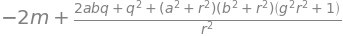

In [79]:
delta_r = ((r ** 2 + a ** 2) * (r ** 2 + b ** 2) * (1 + g ** 2 * r ** 2) + q ** 2 + 2 * a * b * q) / r ** 2 - 2 * m
delta_r

In [80]:
delta_theta = 1 - a ** 2 * g ** 2 * sympy.cos(theta) ** 2 - b ** 2 * g ** 2 * sympy.sin(theta) ** 2
delta_theta

In [81]:
xi_a = 1 - a ** 2 * g ** 2
xi_a

In [82]:
xi_b = 1 - b ** 2 * g ** 2
xi_b

In [83]:
f = 2 * m * rho_squared - q ** 2 + 2 * a * b * q * g ** 2 * rho_squared
f

In [52]:
rho_squared = r ** 2 + a ** 2 * sympy.cos(theta) ** 2 + b ** 2 * sympy.sin(theta) ** 2
rho_squared

In [ ]:
q = -(a - 1j * rplus) * (b - 1j * rplus) * (1 - 1j * rplus)
q